# Compute wham bias from OPES runs

## import required libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.pyplot import cm

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.family'] = 'Sans'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 2

%matplotlib inline

## Run script in notebook or in terminal to get bias values from other runs corresponding to colvars from run i

In [ ]:
%%bash
bash utils/get_bias.sh holo.readbias.dat

## Read colvars and bias from OPES runs where projection and extension cvs along and from axis between A1-A2 and A4-A5 were biased

In [2]:
workdir = "" # directory where colvars and biases are 
figure_dir = '../outfigs'
out_dir = '../outputs'
os.makedirs(figure_dir, exist_ok=True)
os.makedirs(out_dir, exist_ok=True)
workdir

''

In [3]:
cv_bias_data = {}
walls_data = {}

for i in np.linspace(0.0,0.0,1):
    if round(i,3) == -0.0:
        key = "0.0"
    else:
        key = str(round(i,3))
    cv_bias_data[key]=[]
    walls_data[key]=[]

file_template = "_FORCE/DIR/DIR_fes_pullVt_rerun_WIN.colvar_bias.out"

for key in cv_bias_data:
    file_name = file_template.replace('FORCE', key)
     # 20 runs labeled 26 to 45
    for run in range(26,46):
        run_name = file_name.replace('DIR',str(run))
        final_name=run_name.replace('WIN', str(26))
        dist = np.genfromtxt(workdir+final_name, comments='#', dtype=float, usecols = (0,1,2,3,4), skip_header=1501) #skip transient
        biases = dist[::25]
        for win in range(27,46):
            # print(run,win,key)
            final_name=run_name.replace('WIN', str(win))
            bias_win = np.genfromtxt(workdir+final_name, comments='#', dtype=float, usecols = (4), skip_header=1501)
            biases = np.hstack((biases,np.reshape(bias_win[::25],(-1,1))))
            
        cv_bias_data[key].append(biases)
        

26 27 0.0
26 28 0.0
26 29 0.0
26 30 0.0
26 31 0.0
26 32 0.0
26 33 0.0
26 34 0.0
26 35 0.0
26 36 0.0
26 37 0.0
26 38 0.0
26 39 0.0
26 40 0.0
26 41 0.0
26 42 0.0
26 43 0.0
26 44 0.0
26 45 0.0
27 27 0.0
27 28 0.0
27 29 0.0
27 30 0.0
27 31 0.0
27 32 0.0
27 33 0.0
27 34 0.0
27 35 0.0
27 36 0.0
27 37 0.0
27 38 0.0
27 39 0.0
27 40 0.0
27 41 0.0
27 42 0.0
27 43 0.0
27 44 0.0
27 45 0.0
28 27 0.0
28 28 0.0
28 29 0.0
28 30 0.0
28 31 0.0
28 32 0.0
28 33 0.0
28 34 0.0
28 35 0.0
28 36 0.0
28 37 0.0
28 38 0.0
28 39 0.0
28 40 0.0
28 41 0.0
28 42 0.0
28 43 0.0
28 44 0.0
28 45 0.0
29 27 0.0
29 28 0.0
29 29 0.0
29 30 0.0
29 31 0.0
29 32 0.0
29 33 0.0
29 34 0.0
29 35 0.0
29 36 0.0
29 37 0.0
29 38 0.0
29 39 0.0
29 40 0.0
29 41 0.0
29 42 0.0
29 43 0.0
29 44 0.0
29 45 0.0
30 27 0.0
30 28 0.0
30 29 0.0
30 30 0.0
30 31 0.0
30 32 0.0
30 33 0.0
30 34 0.0
30 35 0.0
30 36 0.0
30 37 0.0
30 38 0.0
30 39 0.0
30 40 0.0
30 41 0.0
30 42 0.0
30 43 0.0
30 44 0.0
30 45 0.0
31 27 0.0
31 28 0.0
31 29 0.0
31 30 0.0
31 31 0.0


## Read wall bias

In [5]:
file_template =  "_FORCE/DIR/DIR_fes_pullVt.walls.out"
for key in cv_bias_data:
    file_name = file_template.replace('FORCE', key)
    temp = []
    for run in range(26,46):
        final_name = file_name.replace('DIR',str(run))
        dist = np.genfromtxt(workdir+final_name, comments='#', dtype=float, skip_header=1501)
        walls = dist[:,1:][::25]
        total_walls = np.sum(walls,axis=1)
        outcolumn = np.vstack((dist[:,0][::25], total_walls))
        temp.append(outcolumn.transpose())
    walls_data[key] = temp

## Concatenate colvars and biases

In [6]:
kbT = 0.596161
barrier = 25 # BARRIER parameter used in OPES runs

concat_cvs_bias = {}
concat_walls = {}
concat_walls_time ={}

for key in cv_bias_data:
    biases = cv_bias_data[key]
    concatenated_opes_bias = biases[0]
    walls = walls_data[key]
    concatenated_wall_bias = walls[0][:,1][::]
    cat_wall_time = walls[0][::]

    for i in range(1, len(biases)):
        bias = biases[i]
        wall_bias = walls[i]
        concatenated_opes_bias = np.concatenate((concatenated_opes_bias,bias), axis=0)
        concatenated_wall_bias = np.concatenate((concatenated_wall_bias, wall_bias[:,1][::]), axis=0)
        cat_wall_time = np.concatenate((cat_wall_time, wall_bias[::]), axis=0)
        
    concat_cvs_bias[key] = concatenated_opes_bias
    concat_walls[key] = concatenated_wall_bias
    concat_walls_time[key] = cat_wall_time


## Run wham to obtain optimized bias

In [7]:
from utils.wham import wham
wham_weights = {}
for key in concat_cvs_bias:
    concatenated_bias=concat_cvs_bias[key][:,4:]
    print(f"force: {key}")
    w=wham(concatenated_bias,T=kbT, verbose=False)
    wham_weights[key] = w['logW']


force: 0.0


## Write to files for reweighting and fes computation with plumed

In [9]:
for key in concat_cvs_bias:
    cvs = concat_cvs_bias[key][:,:4]
    walls_t = concat_walls_time[key]
    wham_bias = wham_weights[key]*kbT
    filename = f'{data_dir}/COLVAR_cat_{key}.dat'
    head=" FIELDS time proj ext cmap"
    np.savetxt(filename, cvs, delimiter=' ', newline='\n', header=head, comments='#!', fmt='%.6e')
    filename = f'{data_dir}/WALL_cat_{key}.dat'
    head=" FIELDS time totalwall.bias"
    np.savetxt(filename, walls_t, delimiter=' ', newline='\n', header=head, comments='#!', fmt='%.6e')
    wham_bias_t = np.hstack((cvs[:,0].reshape(-1,1),wham_bias.reshape(-1,1)))
    filename = f'{data_dir}/BIAS_cat_{key}.dat'
    head=" FIELDS time wham.bias"
    np.savetxt(filename, wham_bias_t, delimiter=' ', newline='\n', header=head, comments='#!', fmt='%.6e')
     

## Run in notebook or terminal to obtain FES ouputs

In [ ]:
%%bash
bash utils/reweight_cat.sh plumed_rw_cat_cmap.dat

## Read FES 

In [3]:
all_fes_ext_proj = {}
all_fes_proj_cmap = {}
all_fes_ext_cmap = {}

all_fes_ext = {}
all_fes_proj = {}
all_fes_cmap = {}

for i in np.linspace(0.0,0.0,1):
    if round(i,3) == -0.0:
        key = "0.0"
    else:
        key = str(round(i,3))
    all_fes_ext_proj[key]=[]
    all_fes_ext[key]=[]
    all_fes_proj[key]=[]
    all_fes_cmap[key] = []
    all_fes_proj_cmap[key] = []
    all_fes_ext_cmap[key] = []


file_template = "../outputs/FFORCE_fes_projext_rw.dat"
for k in all_fes_ext_proj:
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_ext_proj[k].append(dist)

    
file_template = "../outputs/FFORCE_fes_projcmap_rw.dat"
for k in all_fes_proj_cmap:
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_proj_cmap[k].append(dist)

file_template = "../outputs/FFORCE_fes_extcmap_rw.dat"
for k in all_fes_ext_cmap:
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_ext_cmap[k].append(dist)
        
file_template = "../outputs/FFORCE_fes_proj_rw.dat"
for k in all_fes_proj:
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_proj[k].append(dist)
        
file_template = "../outputs/FFORCE_fes_ext_rw.dat"
for k in all_fes_ext :
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_ext[k].append(dist)
      
file_template = "../outputs/FFORCE_fes_cmap_rw.dat"
for k in all_fes_cmap:
    final_name = file_template.replace('FORCE', k)
    dist = np.genfromtxt(final_name, comments='#',dtype=float)
    all_fes_cmap[k].append(dist)

## import string function to find MEP and then plot 2D FES with path

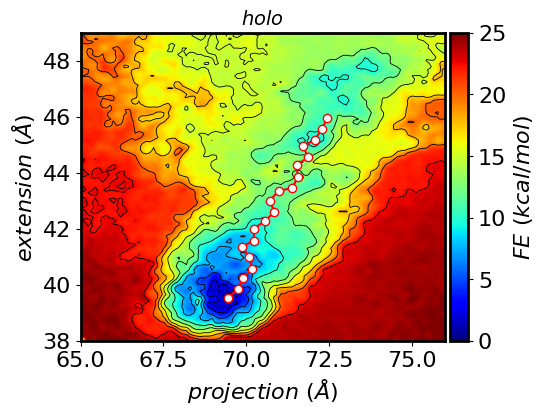

In [4]:
from utils.stringbase import *

maxFE=25
force_barriers_str = {}

file_template = "../outputs/FFORCE_fes_projext_rw.dat"
for key in all_fes_ext_proj:
    runs=all_fes_ext_proj[key]
    final_name = file_template.replace('FORCE', key)
    for i,run in enumerate(runs):
        fig,ax = plt.subplots(figsize=(5, 4))
        x = run[:,0]
        y = run[:,1]
        z = run[:,2]
        index=np.where((z>=maxFE))[0]
        z[index]=maxFE
        X = np.linspace(np.amin(x),np.amax(x), 101)
        Y = np.linspace(np.amin(y), np.amax(y), 101)
        XZ = z.reshape(101,101)
        #fes_twocv.append(XZ)
        ax.contour(X, Y, XZ, 10, colors='black', linewidths=0.6)
        im=ax.imshow(XZ,aspect='auto',origin='lower', cmap='jet', interpolation="gaussian", extent=(x.min(), x.max(), y.min(), y.max()))
        ax.set_title(r"$holo$", size=14)
        ax.set_xlabel(r'$projection\ (\AA)$', size=16)
        ax.set_ylabel(r'$extension\ (\AA)$', size=16)
        # ax.set_xticks([i for i in range(40,91,5)])
        divider = make_axes_locatable(ax)
        cax2 = divider.append_axes("right", size="5%", pad=0.05)
        cbar=fig.colorbar(im, ax=ax, cax=cax2)
        cbar.ax.tick_params(labelsize=16)
        cbar.set_label(r"$FE\ (kcal/mol)$")
        
        landscape = Landscape.from_plumed(final_name, maxFE)
           
        if float(key)< 0:
            x_string=np.linspace(70,71,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(39.5,44.5,20)

        elif float(key)==0:
            x_string=np.linspace(69.5,72.5,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(39.5,46.,20)
        
        else:
            x_string=np.linspace(70,67,20) #Initial guess for the position of nodes of the string
            y_string=np.linspace(39.5,44,20)

        
        string = String(x_string,y_string)
        string.reparameterize(len(x_string))
        np.random.seed(5)
        
        drift_factor = 0.001
        sigma = 0.001 #for random walk
        N = 20
        t = 0

        string_history = [(string.xdata.copy(),string.ydata.copy())]

        for t in range(4000):
            string.random_walk(sigma,sigma)
            string.drift(landscape,drift_factor)
            string.untangle()
            string.reparameterize(N)
            string_history.append((string.xdata.copy(),string.ydata.copy()))

        
        idx_point = np.arange(0,len(string.get_pmf(landscape)),1)
        data_min = [idx_point,string.get_pmf(landscape)-min(string.get_pmf(landscape))]
        force_barriers_str[key]=data_min
    
        ax.plot(string.xdata,string.ydata, 'o-', markerfacecolor='w', c='r')
        #fig.savefig(F"{figure_dir}/fes_extproj_rw_{key}_plumed_wham_str.png", bbox_inches='tight')
        plt.show()       

# Sample code to compute error bar by bootstrapping
## Generate bootstraps
### Distrubute data (cvs and ntraj biases per traj) into NB blocks and generate 100 bootstraps at random with replacement 

In [ ]:

## adapted from PLUMED tutorial: https://www.plumed.org/doc-v2.9/user-doc/html/masterclass-21-3.html
## github: https://github.com/plumed/masterclass-21-3.git
for key in concat_cvs_bias:
    NB=15 # number of blocks
    bw=0.15
    bb_cv = concat_cvs_bias[key]
    bb = bb_cv[:,4:]
    cat_cv = bb_cv[:,:4]
    print("=====shapes of cvs and bias matrices======")
    print(cat_cv.shape,bb.shape)
    print("=====bias matrix=======")
    traj_frame_bias = bb.reshape(20,-1,20) #20 refers to the total number of runs 
    print(traj_frame_bias.shape)
    traj_block_frame_bias=traj_frame_bias.reshape(20,NB,-1,20)
    print(traj_block_frame_bias.shape)
    print("======cv matrix=======")
    traj_frame_cv = cat_cv.reshape(20,-1,4)
    print(traj_frame_cv.shape)
    traj_block_frame_cv = traj_frame_cv.reshape(20,NB,-1,4)
    print(traj_block_frame_cv.shape)

    for i in range(100):
        idx=np.random.choice(NB,NB)  #get index permutation at random
        boot_bias = traj_block_frame_bias[:,idx,:,:]
        resamp_bias = boot_bias.reshape((-1,20))
        w=wham(resamp_bias,T=kbT, verbose=False)
        weight = np.exp(w["logW"])
        out_wham = w["logW"]*kbT
        boot = traj_block_frame_cv[:,idx,:,:] #get CVs corresponding to selected biases
        time_cvs = boot.reshape(-1,4)
        print(time_cvs.shape)
        time_cvs_bias = np.hstack((time_cvs,out_wham.reshape(-1,1))) #build output array with optimized bias
        print(time_cvs_bias.shape, i)
        filename = f'outputs/COLVAR_BIAS_{key}_boot_{i}.dat'
        head=" FIELDS time proj ext cmap wham.bias"
        np.savetxt(filename, time_cvs_bias, delimiter=' ', newline='\n', header=head, comments='#!', fmt='%.9e') #write out bootstrap

## Run in notebook or terminal to obtain FES of each bootstrap

In [ ]:
%%bash
bash utils/reweight_boot.sh plumed_boot.dat outputs

## Read bootstrap FESs 

In [ ]:
boot_fes_ext_proj = {}
boot_fes_proj_cmap = {}
boot_fes_ext_cmap = {}

boot_fes_ext = {}
boot_fes_proj = {}
boot_fes_cmap = {}

for i in np.linspace(0.0,0.0,1):
    if round(i,3) == -0.0:
        key = "0.0"
    else:
        key = str(round(i,3))
    boot_fes_ext_proj[key]=[]
    boot_fes_ext[key]=[]
    boot_fes_proj[key]=[]

    boot_fes_cmap[key] = []
    boot_fes_proj_cmap[key] = []
    boot_fes_ext_cmap[key] = []
    
outprefix="outputs/plumed_boot_pn_"

file_template = "_fes_projext_rw.dat"
for k in boot_fes_ext_proj:
    for b in range(100):
        final_name = f"{outprefix}{k}/{b}/boot{file_template}"
        dist = np.genfromtxt(final_name, comments='#',dtype=float)
        boot_fes_ext_proj[k].append(dist)
   
file_template = "_fes_projcmap_rw.dat"
for k in boot_fes_proj_cmap:
    for b in range(100):
        final_name = f"{outprefix}{k}/{b}/boot{file_template}"
        dist = np.genfromtxt(final_name, comments='#',dtype=float)
        boot_fes_proj_cmap[k].append(dist)

file_template = "_fes_extcmap_rw.dat"
for k in boot_fes_ext_cmap:
    for b in range(100):
        final_name = f"{outprefix}{k}/{b}/boot{file_template}"
        dist = np.genfromtxt(final_name, comments='#',dtype=float)
        boot_fes_ext_cmap[k].append(dist)
        
file_template = "_fes_proj_rw.dat"
for k in boot_fes_proj:
    for b in range(100):
        final_name = f"{outprefix}{k}/{b}/boot{file_template}"
        dist = np.genfromtxt(final_name, comments='#',dtype=float)
        boot_fes_proj[k].append(dist)
        
file_template = "_fes_ext_rw.dat"
for k in boot_fes_ext :
    for b in range(100):
        final_name = f"{outprefix}{k}/{b}/boot{file_template}"
        dist = np.genfromtxt(final_name, comments='#',dtype=float)
        boot_fes_ext[k].append(dist)
      
file_template = "_fes_cmap_rw.dat"
for k in boot_fes_cmap:
    for b in range(100):
        final_name = f"{outprefix}{k}/{b}/boot{file_template}"
        dist = np.genfromtxt(final_name, comments='#',dtype=float)
        boot_fes_cmap[k].append(dist)

## Compute error via std of bootstraps

In [ ]:
fcolors =  cm.jet(np.linspace(0, 1, 100))

for key in boot_fes_proj:
    runs_proj=boot_fes_proj[key]
    runs_ext=boot_fes_ext[key]
    runs_cmap=boot_fes_cmap[key]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
    for i in range(100):
        run_p = runs_proj[i]
        run_e = runs_ext[i]
        run_c = runs_cmap[i]
        
        FEmaxp = np.amax(run_p[:,1][np.isfinite(run_p[:,1])])
        FEp=run_p[:,1]
        FEp[np.isinf(FEp)] = FEmaxp

        FEmaxe = np.amax(run_e[:,1][np.isfinite(run_e[:,1])])
        FEe=run_e[:,1]
        FEe[np.isinf(FEe)] = FEmaxe

        FEmaxc = np.amax(run_c[:,1][np.isfinite(run_c[:,1])])
        FEc=run_c[:,1]
        FEc[np.isinf(FEc)] = FEmaxc
        
        ax1.plot(run_p[:,0][2:], FEp[2:], color=fcolors[i])
        ax2.plot(run_e[:,0][5:], FEe[5:], color=fcolors[i])
        ax3.plot(run_c[:,0][2:], FEc[2:], color=fcolors[i])
        
        ax1.set_ylabel(r'$FE\ (kcal/mol)$', size=14)
        ax1.set_xlabel(r'$proj\ (\AA)$',  size=14)
        ax2.set_xlabel(r'$ext\ (\AA)$',  size=14) 
        ax3.set_xlabel(r'$q\ (\AA)$',  size=14) 
    
    plt.tick_params(axis='both', labelsize=14, width=2)
    fig.suptitle(F'apo {key}', fontsize=12)
    #fig.savefig(F"{figure_dir}/fes_proj_rw_forces_plumed_wham.png", bbox_inches='tight')
    plt.show()

    boot_FES=np.array(runs_proj)
    mean_FESp = np.mean(boot_FES,axis=0)
    std_FESp = np.std(boot_FES,axis=0,ddof=1)
    np.savetxt(f"outputs/proj_err_{key}.dat",std_FESp)

    boot_FES=np.array(runs_ext)
    mean_FESe = np.mean(boot_FES,axis=0)
    std_FESe = np.std(boot_FES,axis=0,ddof=1)
    np.savetxt(f"outputs/ext_err_{key}.dat",std_FESe)

    boot_FES=np.array(runs_cmap)
    mean_FESc = np.mean(boot_FES,axis=0)
    std_FESc = np.std(boot_FES,axis=0,ddof=1)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
    
    ax1.errorbar(mean_FESp[:,0][2:][::2], mean_FESp[:,1][2:][::2], std_FESp[:,1][2:][::2], color='k', ecolor='r')
    ax2.errorbar(mean_FESe[:,0][5:][::2], mean_FESe[:,1][5:][::2], std_FESe[:,1][5:][::2], color='k', ecolor='r')
    ax3.errorbar(mean_FESc[:,0][2:], mean_FESc[:,1][2:], std_FESc[:,1][2:], color='k', ecolor='r')
    plt.tick_params(axis='both', labelsize=14, width=2)
    plt.show()
    